In [45]:
import pickle
import networkx as nx
from itertools import combinations
import numpy as np
import random
import matplotlib.pyplot as plt
with open('base_data/small2Graph1000.p', 'rb') as f:
    G = pickle.load(f)
with open('base_data/G_98-18.p', 'rb') as f :
    data = pickle.load(f)
for v,i in G.edges :
    try :
        G[v][i]['date'] = data[v][i]['date']
    except:
        continue

In [47]:
years = []
years2 = []
unknown2 = 0
for v,i in data.edges():
    years.append(int(str(data[v][i]['date'])[:4]))
for v,i in G.edges():
    try :
        years2.append(int(str(G[v][i]['date'])[:4]))
    except:
        unknown2+=1
    
print("years", np.unique(years, return_counts=True))
print("years2", np.unique(years2, return_counts=True) , " and unknown :", unknown2)

years (array([1500, 1988, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018]), array([    1,     1,     3,     4,    19,   501,  4094,  1706,  1597,
        1831,  2415,  3289,  4464,  6419,  6533,  6905,  9751, 13835,
       17617, 24039, 31901, 37084, 36492, 35343, 15903]))
years2 (array([2004, 2006, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017]), array([  1,   3,   1,   3,   2,   8,  24,  34,  48, 103,  10,   9]))  and unknown : 3


/home/malaville/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


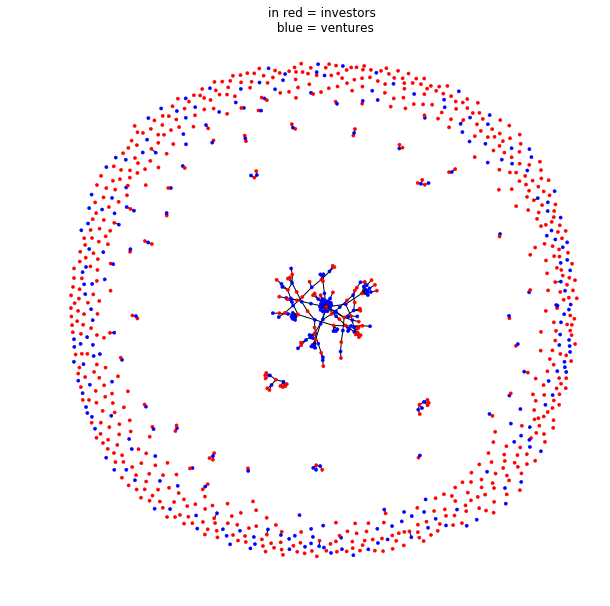

CPU times: user 4.7 s, sys: 266 ms, total: 4.97 s
Wall time: 4.61 s


In [2]:
%%time
plt.figure(figsize=(10,10))
plt.title("in red = investors \n blue = ventures")
colors = []
for node_name in list(G.nodes()) :
    if node_name[:4] == 'inv_':
        colors.append("r")
    else:
        colors.append("b")
    
nx.draw(G, node_size=10, pos=nx.spring_layout(G), node_color=colors, linewidths = 0.5)
plt.show()

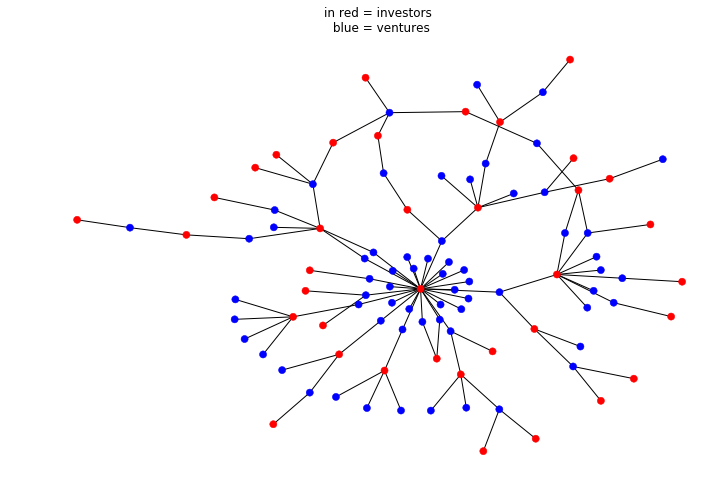

CPU times: user 391 ms, sys: 203 ms, total: 594 ms
Wall time: 319 ms


In [3]:
%%time
connected_components= nx.connected_component_subgraphs(G)
graphs = sorted(list(connected_components), key = lambda x : len(x.node))
G2 = graphs[-1]


plt.figure(figsize=(12,8))
plt.title("in red = investors \n blue = ventures")
colors = []
for node_name in list(G2.nodes()) :
    if node_name[:4] == 'inv_':
        colors.append("r")
    else:
        colors.append("b")
    
nx.draw(G2, node_size=50, pos=nx.kamada_kawai_layout(G2), node_color=colors, linewidths = 0.5)
plt.show()

In [4]:
print("Number of nodes : " ,len(G.nodes))
print("Number of edges : " , len(G.edges))
print("Number of investors : " , len([nod for nod in G.nodes if nod[:4]=='inv_']))

Number of nodes :  1000
Number of edges :  249
Number of investors :  670


### Subset by timestamp and subgraph

We subset the Crunchbase data by taking advantage of the timestamps on each edge to create a network that includes all nodes that received or made an investment between 2005-2015. Due to the nature of the data collection, this preserved > 90% of the Crunchbase data on investments. To make this problem more tractable, we further restricted our analysis to the maximum weakly connected component of the graph (as observed in 2015) which consisted of ∼ 105k edges and ∼ 55k nodes (the next largest 
WCC has 20 nodes). In our network, there are ∼ 21k investors and ∼ 34k companies.


In [5]:
edges_05_15 = set([edge for edge in G.edges() if G[edge[0]][edge[1]] and str(G[edge[0]][edge[1]]['date'])[:4] in [str(x) for x in range(2005, 2016)]])
not_edges_05_15_or_with_no_dates = set(G.edges()) - edges_05_15
print(len(edges_05_15), " between 2005 and 2015 versus 249 before")
print(len(not_edges_05_15_or_with_no_dates), " deleted")

226  between 2005 and 2015 versus 249 before
23  deleted


In [6]:
G.remove_edges_from(not_edges_05_15_or_with_no_dates)
print(len(G.edges()))
subgraphs = nx.connected_component_subgraphs(G)

226


In [7]:
subgraphslist = list(subgraphs)
number_of_subgraphs = len(subgraphslist)
sizes = [g.number_of_nodes() for g in subgraphslist]
mean_sizes = sum(sizes)/number_of_subgraphs
sizes2 = np.unique(sizes, return_counts=True)

print("Number of subgraphs :", number_of_subgraphs)
print("Mean size : ", mean_sizes)
print("Size \t Occurences")
for i in range(len(sizes2[0])):
    print(str(sizes2[0][i]) + "\t" + str(sizes2[1][i]))

Number of subgraphs : 778
Mean size :  1.2853470437017995
Size 	 Occurences
1	718
2	40
3	10
4	3
5	3
8	1
10	1
33	1
94	1


94


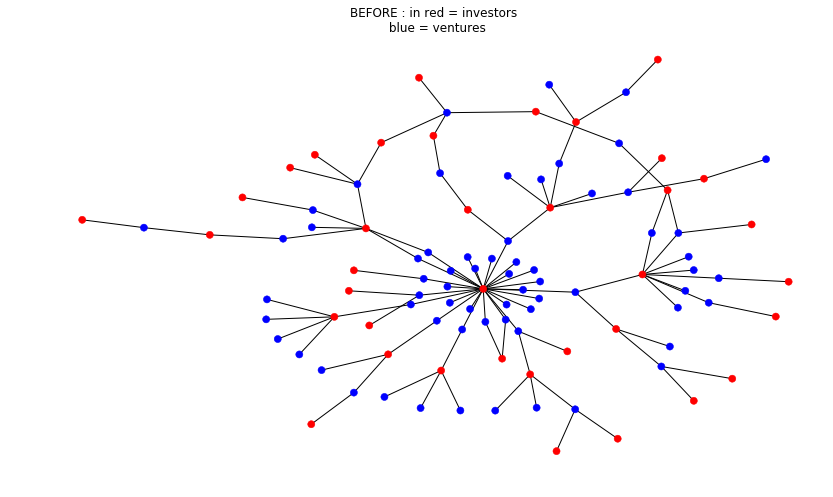

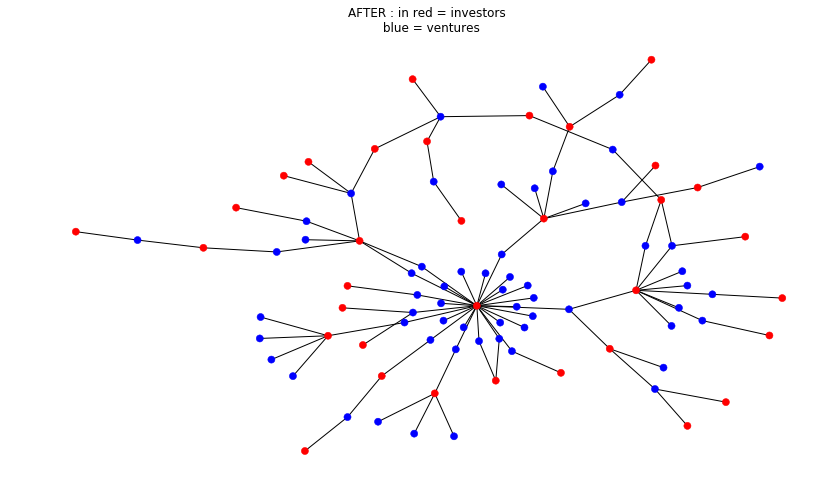

In [8]:
biggest_subgraph = sorted(subgraphslist, key = lambda x : len(x.nodes()))[-1]
print(len(biggest_subgraph.nodes()))
pos=nx.kamada_kawai_layout(G2)
figsize=(14,8)

#Versus initial biggest
plt.figure(figsize=figsize)
plt.title("BEFORE : in red = investors \n blue = ventures")
colors = []
for node_name in list(G2.nodes()) :
    if node_name[:4] == 'inv_':
        colors.append("r")
    else:
        colors.append("b")
    
nx.draw(G2, node_size=50, pos=pos, node_color=colors, linewidths = 0.5)
plt.show()

#New Biggest
plt.figure(figsize=figsize)
plt.title("AFTER : in red = investors \n blue = ventures")
colors = []
for node_name in list(biggest_subgraph.nodes()) :
    if node_name[:4] == 'inv_':
        colors.append("r")
    else:
        colors.append("b")
    
nx.draw(biggest_subgraph, node_size=50, pos=pos, node_color=colors, linewidths = 0.5)
plt.show()



### Are there investor - investor or v - v relations ?
While the majority of our data adhered to the binary division between investor and startups, ∼ 400 nodes had both
received and given investments over our 10-year observation period. To enforce the bipartite property, we assigned
entities with strictly higher out-degree to the investor group
(and removed their incoming investment edges) and the
other companies to the start-up group (and removed their
outgoing investment edges). This simple heuristic preserves
the maximum number of edges and, by manual inspection,
seems to perform well in distinguishing the primary function of an entity.

In [9]:
investors = [inv for inv in G.nodes() if inv[:4]=='inv_']
ventures = [v for v in G.nodes() if v[:4] != 'inv_']
abnormal_inv_inv_links = []
abnormal_v_v_links = []
for inv1 in investors:
    for inv2 in investors :
        if inv2 in list(G[inv1]):
            print(inv1, inv2)
            abnormal_inv_inv_links.append((inv1,inv2))
for v1 in ventures:
    for v2 in ventures :
        if v2 in list(G[v1]):
            print(v1, v2)
            abnormal_v_v_links.append((v1,v2))

In [10]:
print("Nombre de liens anormaux INV_INV / V_V", len(abnormal_inv_inv_links), len(abnormal_v_v_links))

Nombre de liens anormaux INV_INV / V_V 0 0


In [20]:
G['inv_gang-fang']

AtlasView({'lawn-love': {'date': datetime.date(2014, 11, 12)}})

### Working on the new subgraph 2005 - 2015
#### Making 3months snapshots

In [11]:
G3 = biggest_subgraph
del G
del G2
del biggest_subgraph
G3

In [29]:
selectors = {}
for year in range(2005, 2016):
    selectors[year] = {}
    for trimestre in [1,2,3,4] :
        mois = [3*(trimestre-1) + x for x in [1,2,3]]
        selectors[year][trimestre] = [(year, moi) for moi in mois]
        
def selectors_list(from_y_t, to_y_t) :
    list_of_matching_year_month = []
    if from_y_t[0] == to_y_t[0]:
        for trimester in range(from_y_t[1], to_y_t[1] +1) :
            list_of_matching_year_month+=(selectors[from_y_t[0]][trimester])
        return list_of_matching_year_month
    else :
        for year in range(from_y_t[0], to_y_t[0] +1):
            if year == from_y_t[0] :
                for trimester in range(from_y_t[1], 5):
                    list_of_matching_year_month+=(selectors[year][trimester])
            elif year == to_y_t[0] :
                for trimester in range(1, to_y_t[1]+1) :
                    list_of_matching_year_month+=(selectors[year][trimester])
            else:
                for trimester in range(1,5):
                    list_of_matching_year_month+=(selectors[year][trimester])
        return list_of_matching_year_month

def edges_with_year_trimester(G, from_y_t, to_y_t):
    yt_list = selectors_list(from_y_t, to_y_t)
    edges_corresponding = set([edge for edge in G.edges() if G[edge[0]][edge[1]] and (int(str(G[edge[0]][edge[1]]['date'])[:4]) , int(str(G[edge[0]][edge[1]]['date'])[5:7])) in yt_list])
    return(edges_corresponding)

In [35]:
%%capture
pos=nx.kamada_kawai_layout(G3)
figsize=(14,5)
for y in range(2005,2016):
    for t in range(1,5):
        edgesLocal = edges_with_year_trimester(G3, (2005,1), (y, t))
        Glocal = nx.Graph()
        Glocal.add_edges_from(edgesLocal)
        plt.figure(figsize=figsize)
        plt.xlim([-1,1])
        plt.ylim([-1,1])
        plt.title("from 2005 to {0} - {1}th trimester".format(y,t))
        colors = []
        for node_name in list(Glocal.nodes()) :
            if node_name[:4] == 'inv_':
                colors.append("r")
            else:
                colors.append("b")

        nx.draw(Glocal, node_size=50, pos=pos, node_color=colors, linewidths = 0.5)
        plt.savefig("output_data/growing_subgraph_{0}_{1}.png".format(y,t))

<img src="content/gifexample_data.gif">